# Data Exploration and Validation

In this exercise we will cover how to use Ibis, Pandas, and Pandera to explore, tidy, and validate the data.

### Activity 1 - load data from SQL

#### 🔄 Task

- Use `ibis` to load the data from SQL into a pandas dataframe.

🚨 Only load the first 10,000 rows. This will speed our our ETL and testing.

#### ✅ Solution

In the first exercise we used SQLAlchemy to interact with SQL. Ibis is another Python package for interacting with SQL databases. Ibis is specially designed for analytics workloads.

```bash
python -m pip install 'ibis-framework[postgres]'
```

In [1]:
import os

import ibis

# Set up ibis for reading data
con = ibis.postgres.connect(
    user="posit",
    password=os.environ["CONF23_DB_PASSWORD"],
    host=os.environ["CONF23_DB_HOST"],
    port=5432,
    database="python_workshop"
)

Load the business license data.

In [2]:
business_license_raw = con.table(name="business_license_raw").limit(10_000).to_pandas()
business_license_raw

,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
0,1000000-20020221,1000000,200001,1,MARK BOSTON,COLORS IN MOTION,6421 N DAMEN AVE,CHICAGO,IL,60645,...,2002-02-21T00:00:00.000,2002-11-15T00:00:00.000,2002-02-21T00:00:00.000,2002-02-22T00:00:00.000,AAI,None,None,41.998514371,-87.680010905,"\n, \n(41.99851437112669, -87.68001090539342)"
1,1000049-20010816,1162772,200068,1,ANTONIA CASTREJON,ILLUSIONS HAIR DESIGN,3800 W DIVERSEY AVE,CHICAGO,IL,60647,...,2001-08-16T00:00:00.000,2002-08-15T00:00:00.000,2001-08-20T00:00:00.000,2002-04-30T00:00:00.000,AAI,None,None,41.931960333,-87.722150366,"\n, \n(41.931960332638006, -87.72215036594574)"
2,1000049-20020516,1233615,10141,2,"PEPE""S RETAIL MEATS, INC.",PEREZ MEXICAN FOOD,853-855 W RANDOLPH ST 1ST,CHICAGO,IL,60607,...,2002-05-16T00:00:00.000,2003-05-15T00:00:00.000,2002-04-17T00:00:00.000,2002-04-18T00:00:00.000,AAI,None,None,41.884261422,-87.649534131,"\n, \n(41.88426142200001, -87.6495341312589)"
3,1000049-20020816,1265665,200068,1,ANTONIA CASTREJON,ILLUSIONS HAIR DESIGN,3800 W DIVERSEY AVE,CHICAGO,IL,60647,...,2002-08-16T00:00:00.000,2003-08-15T00:00:00.000,2002-08-13T00:00:00.000,2002-08-14T00:00:00.000,AAI,None,None,41.931960333,-87.722150366,"\n, \n(41.931960332638006, -87.72215036594574)"
4,1000049-20030516,1342680,10141,2,"PEPE""S RETAIL MEATS, INC.",PEREZ MEXICAN FOOD,853-855 W RANDOLPH ST 1ST,CHICAGO,IL,60607,...,2003-05-16T00:00:00.000,2004-05-15T00:00:00.000,2003-04-17T00:00:00.000,2003-04-18T00:00:00.000,AAI,None,None,41.884261422,-87.649534131,"\n, \n(41.88426142200001, -87.6495341312589)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1045480-20051116,1635571,203624,1,"Centli, Inc.",Vintage Wine Bar,1942 W DIVISION ST,CHICAGO,IL,60622,...,2005-11-16T00:00:00.000,2006-11-15T00:00:00.000,2005-12-16T00:00:00.000,2005-12-16T00:00:00.000,AAI,None,33,41.903311984,-87.676573371,"\n, \n(41.903311984082535, -87.67657337106594)"
9996,1045480-20061116,1755180,203624,1,"Centli, Inc.",Vintage Wine Bar,1942 W DIVISION ST,CHICAGO,IL,60622,...,2006-11-16T00:00:00.000,2007-11-15T00:00:00.000,None,2008-05-23T00:00:00.000,AAI,None,33,41.903311984,-87.676573371,"\n, \n(41.903311984082535, -87.67657337106594)"
9997,1045480-20071116,1908790,203624,1,"Centli, Inc.",Vintage Wine Bar,1942 W DIVISION ST,CHICAGO,IL,60622,...,2007-11-16T00:00:00.000,2008-11-15T00:00:00.000,2008-05-27T00:00:00.000,2008-05-27T00:00:00.000,AAI,None,33,41.903311984,-87.676573371,"\n, \n(41.903311984082535, -87.67657337106594)"
9998,1045481-20021116,1281309,14713,2,ISAAC MALIS,OLD WORLD RESTORATION,2529 W DIVISION ST,CHICAGO,IL,60622,...,2002-11-16T00:00:00.000,2003-11-15T00:00:00.000,2002-10-16T00:00:00.000,2002-10-17T00:00:00.000,AAI,None,None,41.902872438,-87.690658466,"\n, \n(41.902872438242625, -87.69065846571665)"


Load the food inspection data.

In [3]:
food_inspection_raw = con.table(name="food_inspection_raw").limit(10_000).to_pandas()
food_inspection_raw

,inspection_id,dba_name,aka_name,license_,facility_type,risk,address,city,state,zip,inspection_date,inspection_type,results,violations,latitude,longitude,location
0,606364,REESE'S LOUNGE,REESE'S LOUNGE,1845193,BAR,Risk 3 (Low),1827 W 87TH ST,CHICAGO,IL,60620,2011-08-09T00:00:00.000,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.73560035888288,-87.66907677991776,"(41.73560035888288, -87.66907677991776)"
1,634211,SULTAN'S MARKET,SULTAN'S MARKET,2031862,Restaurant,Risk 1 (High),2057 W NORTH AVE,CHICAGO,IL,60647,2011-08-09T00:00:00.000,Tag Removal,Pass,"30. FOOD IN ORIGINAL CONTAINER, PROPERLY LABEL...",41.91033293012805,-87.67971585451996,"(41.91033293012805, -87.67971585451996)"
2,521658,AZTECAS MEX TAQUERIA,AZTECAS MEX TAQUERIA,1740842,Restaurant,Risk 1 (High),5421 N LINCOLN AVE,CHICAGO,IL,60625,2011-08-09T00:00:00.000,Short Form Complaint,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.980147023893736,-87.69259562274559,"(41.980147023893736, -87.69259562274559)"
3,565459,SEPIA,PRIVATE DINING BY SEPIA,2093248,Restaurant,Risk 1 (High),135 N JEFFERSON ST,CHICAGO,IL,60661,2011-08-09T00:00:00.000,License Re-Inspection,Pass,None,41.88430907469268,-87.64258376979427,"(41.88430907469268, -87.64258376979427)"
4,531488,MORGAN FOOD CORP LLC,MORGAN FOOD CORP LLC,1270949,Grocery Store,Risk 1 (High),6600 S MORGAN ST,CHICAGO,IL,60621,2011-08-09T00:00:00.000,Canvass,Pass,31. CLEAN MULTI-USE UTENSILS AND SINGLE SERVIC...,41.77412895382648,-87.64964599733383,"(41.77412895382648, -87.64964599733383)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,679671,BLUE WILLOW CHINESE RESTAURANT,BLUE WILLOW CHINESE RESTAURANT,1769280,Restaurant,Risk 1 (High),2418 W FULLERTON AVE,CHICAGO,IL,60647,2012-03-09T00:00:00.000,Canvass,Out of Business,None,41.92500430630925,-87.68841336320455,"(41.92500430630925, -87.68841336320455)"
9996,1188538,SUBWAY,SUBWAY,1677177,Restaurant,Risk 1 (High),4019 N LINCOLN AVE,CHICAGO,IL,60618,2013-03-20T00:00:00.000,Canvass Re-Inspection,Pass,None,41.9549277439019,-87.67912783944996,"(41.9549277439019, -87.67912783944996)"
9997,670924,SEE THRU CHINESE KITCHEN,SEE THRU CHINESE KITCHEN,36468,Restaurant,Risk 1 (High),10939 S WESTERN AVE,CHICAGO,IL,60643,2012-02-28T00:00:00.000,Short Form Complaint,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.69422064707933,-87.68108589547474,"(41.69422064707933, -87.68108589547474)"
9998,1235127,JUICE BOOST !,JUICE BOOST !,1469977,None,Risk 3 (Low),1750 N CLARK ST,CHICAGO,IL,60614,2012-02-28T00:00:00.000,Canvass,Out of Business,None,41.91434219938819,-87.63373571866379,"(41.91434219938819, -87.63373571866379)"


### Activity 2 - Explore the data

#### 🔄 Task

Begin exploring the data. You will want to understand.

- What columns exist in the data?
- How do the two data sets relate to one another?
- What is the type of each column (e.g. string, number, category, date)?
- Which columns could be useful for the model.
- What is the cardinality of categorical data?
- Is all of the data in scope?
- What steps will I need to perform to clean the data?

🚨 We are not performing feature engineering at this stage. But it is a good time to start thinking about what features you can create from the data.

#### ✅ Solution

In [4]:
import pandas as pd

##### Business license data

Distribution of business locations:

<Axes: xlabel='latitude', ylabel='longitude'>

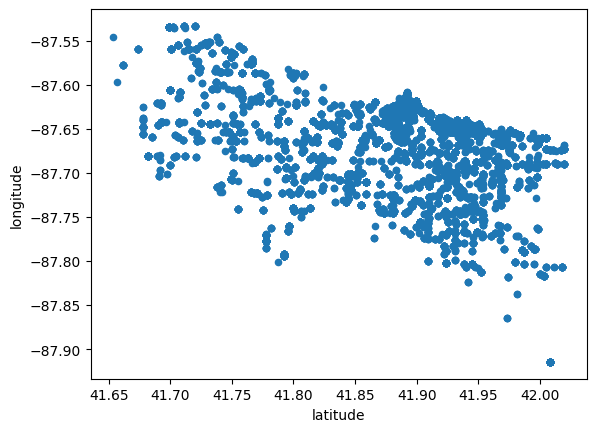

In [5]:
business_license_raw \
    .assign(
        latitude=lambda x: pd.to_numeric(x["latitude"]),
        longitude=lambda x: pd.to_numeric(x["longitude"]),
    ) \
    .plot(x="latitude", y="longitude", kind="scatter")

Most common license types:

In [6]:
business_license_raw \
    .assign(license_code_name=lambda x: x["license_code"] + " - " + x["license_description"]) \
    .loc[:, "license_code_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(50)

1010 - Limited Business License                         4306
1006 - Retail Food Establishment                        1655
1781 - Tobacco                                           643
1475 - Consumption on Premises - Incidental Activity     619
1470 - Tavern                                            315
1474 - Package Goods                                     247
1012 - Home Occupation                                   201
1569 - Motor Vehicle Repair : Engine Only (Class II)     186
1011 - Home Repair                                       184
1009 - Manufacturing Establishments                      184
1008 - Hazardous Materials                               127
1050 - Public Place of Amusement                          98
1007 - Wholesale Food Establishment                       90
1570 - Motor Vehicle Repair: Engine/Body(Class III)       88
1275 - Filling Station                                    81
1477 - Outdoor Patio                                      80
1676 - Scavenger, Privat

Do businesses have multiple licenses?

In [7]:
# Find the most common business
most_common_business = business_license_raw["legal_name"] \
    .value_counts() \
    .sort_values(ascending=False) \
    .head(1) \
    .reset_index() \
    .loc[0, "index"]

print(most_common_business)

business_license_raw \
    .loc[business_license_raw["legal_name"] == most_common_business] \
    .sort_values(by="license_id")

CHIPOTLE MEXICAN GRILL, INC.


,id,license_id,account_number,site_number,legal_name,doing_business_as_name,address,city,state,zip_code,...,license_start_date,expiration_date,license_approved_for_issuance,date_issued,license_status,license_status_change_date,ssa,latitude,longitude,location
8154,1044712-20020216,1202526,22633,5,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,10 E JACKSON BLVD,CHICAGO,IL,60604,...,2002-02-16T00:00:00.000,2003-02-15T00:00:00.000,2002-05-15T00:00:00.000,2002-06-06T00:00:00.000,AAI,None,1,41.878331549,-87.627323897,"\n, \n(41.87833154856475, -87.62732389735858)"
8181,1044715-20020516,1236529,22633,6,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,1166 N STATE ST 200,CHICAGO,IL,60610,...,2002-05-16T00:00:00.000,2002-11-15T00:00:00.000,2002-05-17T00:00:00.000,2002-06-06T00:00:00.000,AAI,None,None,41.90383566,-87.628826107,"\n, \n(41.90383565973192, -87.6288261074516)"
8241,1044725-20020516,1236530,22633,7,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,291 E ONTARIO ST,CHICAGO,IL,60611,...,2002-05-16T00:00:00.000,2002-11-15T00:00:00.000,2002-05-15T00:00:00.000,2002-06-06T00:00:00.000,AAI,None,None,41.893293677,-87.620392895,"\n, \n(41.89329367658513, -87.62039289469121)"
8182,1044715-20021116,1283492,22633,6,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,1166 N STATE ST 200,CHICAGO,IL,60610,...,2002-11-16T00:00:00.000,2003-05-15T00:00:00.000,2002-11-14T00:00:00.000,2002-11-15T00:00:00.000,AAI,None,None,41.90383566,-87.628826107,"\n, \n(41.90383565973192, -87.6288261074516)"
8168,1044714-20021116,1283493,22633,6,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,1166 N STATE ST 200,CHICAGO,IL,60610,...,2002-11-16T00:00:00.000,2003-11-15T00:00:00.000,2002-11-14T00:00:00.000,2002-11-15T00:00:00.000,AAI,None,None,41.90383566,-87.628826107,"\n, \n(41.90383565973192, -87.6288261074516)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8167,1044712-20210516,2777013,22633,5,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,10 E JACKSON BLVD,CHICAGO,IL,60604,...,2021-05-16T00:00:00.000,2023-05-15T00:00:00.000,2021-04-27T00:00:00.000,2021-04-28T00:00:00.000,AAI,None,1,41.878331549,-87.627323897,"\n, \n(41.87833154856475, -87.62732389735858)"
8196,1044715-20210516,2777015,22633,6,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,1166 N STATE ST 200,CHICAGO,IL,60610,...,2021-05-16T00:00:00.000,2023-05-15T00:00:00.000,2021-04-27T00:00:00.000,2021-04-28T00:00:00.000,AAC,2023-01-24T00:00:00.000,None,41.90383566,-87.628826107,"\n, \n(41.90383565973192, -87.6288261074516)"
8180,1044714-20210516,2777016,22633,6,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,1166 N STATE ST 200,CHICAGO,IL,60610,...,2021-05-16T00:00:00.000,2023-05-15T00:00:00.000,2021-04-27T00:00:00.000,2021-04-28T00:00:00.000,AAI,None,None,41.90383566,-87.628826107,"\n, \n(41.90383565973192, -87.6288261074516)"
8255,1044725-20210516,2777017,22633,7,"CHIPOTLE MEXICAN GRILL, INC.",CHIPOTLE MEXICAN GRILL,291 E ONTARIO ST,CHICAGO,IL,60611,...,2021-05-16T00:00:00.000,2023-05-15T00:00:00.000,2021-04-27T00:00:00.000,2021-04-28T00:00:00.000,AAC,2023-01-24T00:00:00.000,None,41.893293677,-87.620392895,"\n, \n(41.89329367658513, -87.62039289469121)"


Does each license only one row in the table?

In [8]:
business_license_raw["license_id"].value_counts().sort_values(ascending=False)

1000000    1
1533784    1
1808537    1
1233615    1
1265665    1
          ..
1443735    1
1533974    1
1216357    1
1635571    1
1427768    1
Name: license_id, Length: 10000, dtype: int64

Does all the data relate to Chicago?

In [9]:
business_license_raw["city"].value_counts().sort_values(ascending=False)

CHICAGO          9611
NILES              22
BERWYN             21
NORTHBROOK         15
MAYWOOD            14
                 ... 
OAKBROOK            1
LAKE VILLA          1
HOMEWOOD            1
GLEN ELLYN          1
DOWNERS GROVE       1
Name: city, Length: 69, dtype: int64

In [10]:
business_license_raw["state"].value_counts().sort_values(ascending=False)

IL    9977
NC      14
IN       9
Name: state, dtype: int64

##### Food inspection data 

What are the different risk levels?

<Axes: >

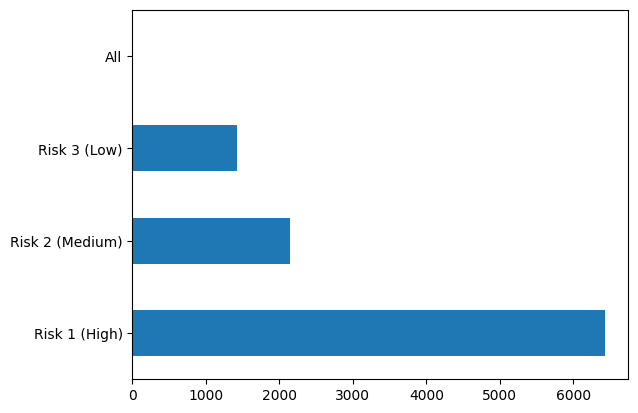

In [11]:
food_inspection_raw["risk"].value_counts().plot(kind="barh")

What are the most common violations?

In [12]:
food_inspection_raw["violations"].value_counts().sort_values(ascending=False)

32. FOOD AND NON-FOOD CONTACT SURFACES PROPERLY DESIGNED, CONSTRUCTED AND MAINTAINED - Comments: FOR NEXT REGULAR INSPECTION | 33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSILS CLEAN, FREE OF ABRASIVE DETERGENTS - Comments: FOR NEXT REGULAR INSPECTION | 34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOOD REPAIR, COVING INSTALLED, DUST-LESS CLEANING METHODS USED - Comments: FOR NEXT REGULAR INSPECTION | 35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTRUCTED PER CODE: GOOD REPAIR, SURFACES CLEAN AND DUST-LESS CLEANING METHODS - Comments: FOR NEXT REGULAR INSPECTION                                                                                                                                                                                                                                                                                                                                                                                                                                                       

What are the most common outcomes?

<Axes: >

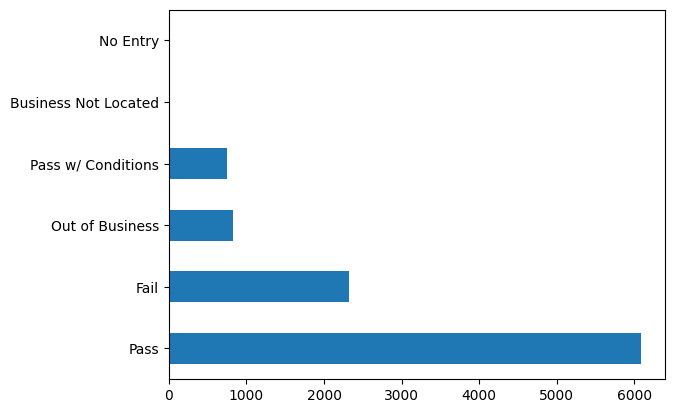

In [13]:
food_inspection_raw["results"].value_counts().plot(kind="barh")

What are the most common facility types?

In [14]:
food_inspection_raw["facility_type"].value_counts().sort_values(ascending=False).head(25)

Restaurant                         5993
Grocery Store                      1662
School                              663
Daycare (2 - 6 Years)               213
Bakery                              132
Daycare Above and Under 2 Years     131
Children's Services Facility        105
Wholesale                            83
Daycare Combo 1586                   74
Mobile Food Dispenser                69
Long Term Care                       59
Catering                             52
Liquor                               49
Shared Kitchen User (Long Term)      48
Hospital                             26
Golden Diner                         25
Daycare (Under 2 Years)              13
Shelter                              13
TAVERN                               10
DAYCARE                               8
STADIUM                               6
CONVENIENCE STORE                     6
CONVENIENCE                           5
GAS STATION                           5
coffee shop                           4


### Activity 3 - Tidy Data

#### 🔄 Task

Now that you have a basic understanding of the data, the next step is to tidy the data. Create a new notebook that:

- Reads in the raw data from the postgres database.
- Tidy's the dataset.

Tips:

- Remove unnecessary rows.
- Remove unnecessary columns.

#### ✅ Solution

See notebook [example/02-etl-data-validation/notebook.ipynb](../example/02-etl-data-validation/notebook.ipynb) for examples.

### Activity 4 - Validate Data (Quick Start)

#### 🔄 Task

In the previous activity we tidied the dataset. For some projects, this may be enough. However, for this project we plan to refresh the data on a regular basis. We would like to gain additional comfort that the data we are using is correct. Data validation can help prove that our data tidying was correct, and find any potential issues if the upstream data changes.

[Pandera](https://pandera.readthedocs.io/en/stable/) is a Python library for validating Pandas dataframes. There are two steps:

1. Define a schema for your data:
   - Define the type for each column
   - Confirm if null values are allowed
   - Define custom checks
2. Run your data through the schema validator.

Take 5 minutes, and work through quick start section of the Pandera Docs: https://pandera.readthedocs.io/en/stable/index.html#quick-start.

#### ✅ Solution

In [15]:
import pandas as pd
import pandera as pa

# data to validate
df = pd.DataFrame({
    "column1": [1, 4, 0, 10, 9],
    "column2": [-1.3, -1.4, -2.9, -10.1, -20.4],
    "column3": ["value_1", "value_2", "value_3", "value_2", "value_1"],
})

# define schema
schema = pa.DataFrameSchema({
    "column1": pa.Column(int, checks=pa.Check.le(10)),
    "column2": pa.Column(float, checks=pa.Check.lt(-1.2)),
    "column3": pa.Column(str, checks=[
        pa.Check.str_startswith("value_"),
        # define custom checks as functions that take a series as input and
        # outputs a boolean or boolean Series
        pa.Check(lambda s: s.str.split("_", expand=True).shape[1] == 2)
    ]),
})

validated_df = schema(df)
print(validated_df)

   column1  column2  column3
0        1     -1.3  value_1
1        4     -1.4  value_2
2        0     -2.9  value_3
3       10    -10.1  value_2
4        9    -20.4  value_1


### Activity 5 - Validate Data (Real Data)

#### 🔄 Task

Now that you understand how Pandera works, lets validate our tidy data! In your notebook where you tidy the data, create Schema to validate both data sets.

Tips:

- Most of the columns have null values.
- Use the `coerce` keyword option to automatically convert columns to the correct type.
- For categorical data, confirm that only the expected categories exist.
- Think about custom checks that you can add to validate the data.

Once your data is validated, write the validated data back to the SQL database.

🚨 Please prefix any tables you create with your name! For example:

- `sam_business_license_validated`
- `sam_food_inspections_validated`

#### ✅ Solution

See notebook [example/02-etl-data-validation/notebook.ipynb](../example/02-etl-data-validation/notebook.ipynb) for examples.